In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import os

In [3]:
os.getcwd()

'c:\\Users\\nasut\\OneDrive\\Documents\\Kuliah\\Semester 7\\PKKM\\BMKG\\Project\\MONAS-Dashboard'

In [4]:
os.listdir()

['.git',
 '.gitignore',
 '.vscode',
 'app.py',
 'catboost_info',
 'Modelling',
 'Random Test',
 'XGB_Hyperparameter.ipynb']

In [5]:
df = pd.read_csv('C:/Users/nasut/OneDrive/Documents/Kuliah/Semester 7/PKKM/BMKG/Project/Data/data_fix_temp.txt')

In [6]:
df

,Date,lokasi,con_prec.mm.,mic_prec.mm.,sha_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,...,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,t_obs
1,2021-02-27 15:00:00,96001,0.000000,0.000000e+00,0,27.3973,21.6059,70.8014,3.433260,12.4580,...,-5.20890,11.0889,6.22327,57.5841,0,12,5.87655,95.33785,126,23.2
2,2021-02-27 18:00:00,96001,0.000000,0.000000e+00,0,27.0090,21.5161,72.0376,3.049010,27.2450,...,-5.05963,12.7044,5.96761,59.9813,0,12,5.87655,95.33785,126,23.0
3,2021-02-27 21:00:00,96001,0.000000,0.000000e+00,0,26.5672,21.4226,73.5149,2.045560,37.3569,...,-4.89987,15.2381,7.04134,67.3222,0,12,5.87655,95.33785,126,21.6
4,2021-02-28 00:00:00,96001,0.000000,0.000000e+00,0,26.4519,21.5400,74.5507,2.225080,20.1816,...,-4.72228,16.3007,7.54606,65.4942,0,12,5.87655,95.33785,126,19.8
5,2021-02-28 03:00:00,96001,0.000000,0.000000e+00,0,26.7230,21.3691,72.6038,2.342680,14.7934,...,-4.64246,19.0442,8.93947,73.4932,0,12,5.87655,95.33785,126,28.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544270,2023-04-12 03:00:00,99992,0.003601,0.000000e+00,0,29.7642,23.4001,68.8035,3.721340,261.5040,...,-4.69787,73.0758,2.29511,231.9670,0,12,-6.30253,106.75640,41,31.8
544271,2023-04-12 06:00:00,99992,3.669660,7.573590e-21,0,30.7901,24.1140,67.7143,5.811930,263.9440,...,-4.63960,75.7922,2.05083,268.5790,0,12,-6.30253,106.75640,41,35.0
544272,2023-04-12 09:00:00,99992,4.045040,2.640270e-09,0,28.8450,24.1964,76.1178,5.839920,268.8950,...,-4.40575,77.1489,2.52709,272.9220,0,12,-6.30253,106.75640,41,30.6
544273,2023-04-12 12:00:00,99992,0.000000,0.000000e+00,0,25.8334,23.9709,89.6050,0.500122,210.7490,...,-4.33471,76.3170,3.07955,259.2500,1,12,-6.30253,106.75640,41,28.4


In [7]:
X = df.drop(columns=['t_obs','Date', 'hari', 'LAT', 'LON', 'ELEV', 'UTC', 'sha_prec.mm.']) 
y = df['t_obs']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
from xgboost import XGBRegressor
# import xgboost

In [10]:
X_train

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.
13562,96015,0.297127,0.000000e+00,24.9036,24.0379,95.0860,1.81476,0.616821,1.000000,0.706183,...,1.73555,328.1760,14.2433,87.7301,3.18219,264.2640,-5.43359,82.1250,2.81592,168.5090
276050,96925,0.008678,0.000000e+00,27.9911,25.5809,86.8795,3.51757,267.177000,0.793893,0.000000,...,4.40488,261.3390,16.4620,55.3477,10.27550,275.2550,-4.56438,66.5390,5.69468,265.0610
241203,96753,0.000000,0.000000e+00,24.6040,21.4916,82.9613,1.85819,171.001000,0.518321,0.357866,...,0.18197,170.6130,15.3600,81.3415,4.94584,99.9720,-4.66806,62.8102,7.82548,56.4713
29994,96041,0.354811,6.091090e-16,30.2889,24.5733,71.6300,4.40771,49.978000,0.314357,0.242108,...,4.54612,54.2861,16.1579,80.6937,7.06553,235.2470,-5.18692,69.3007,2.07341,162.6650
283260,96933,0.013520,1.304190e-02,25.0231,23.2035,89.7838,3.18669,255.390000,0.520257,0.954700,...,3.85358,286.1800,14.9123,88.9598,10.78850,271.3340,-5.03098,90.3660,7.75485,243.3150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110269,96237,1.307820,0.000000e+00,27.1616,22.9755,78.0239,5.87378,328.619000,0.830265,0.663651,...,9.80488,326.0700,14.5278,80.4913,13.24360,274.4180,-6.19903,67.2281,8.04781,338.1110
259179,96835,0.000000,2.450060e-10,28.1118,23.2621,75.0928,4.15483,334.591000,0.462255,0.543359,...,4.33375,330.3090,15.0957,88.5626,1.58414,204.4240,-5.27773,68.4889,3.30381,101.9190
365839,97144,0.000000,0.000000e+00,21.9531,21.1807,95.5451,2.09484,247.600000,0.352767,0.046931,...,1.89542,72.9220,15.1789,58.9489,6.85077,127.0540,-4.74267,51.7205,3.52225,312.2180
131933,96295,0.000000,0.000000e+00,21.2204,18.8843,86.6881,2.21610,241.445000,0.077423,0.334305,...,2.59798,148.9180,13.9205,83.2002,6.87805,57.6272,-4.86007,56.2651,6.75673,88.1868


In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [69]:
scaler = MinMaxScaler()

In [70]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [72]:
X_train_scaled

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.
0,0.003508,0.008310,0.000000e+00,0.544768,0.861402,0.936045,0.101900,0.001709,1.000000,0.706183,...,0.061060,0.911604,0.333016,0.877300,0.102474,0.734281,0.415069,0.821250,0.108374,0.468279
1,0.231521,0.000243,0.000000e+00,0.669276,0.927295,0.829239,0.197677,0.742161,0.793893,0.000000,...,0.155580,0.725943,0.516407,0.553474,0.331802,0.764846,0.521828,0.665390,0.222801,0.736825
2,0.188424,0.000000,0.000000e+00,0.532686,0.752664,0.778244,0.104343,0.475003,0.518321,0.357866,...,0.006048,0.473923,0.425319,0.813414,0.159493,0.277395,0.509094,0.628102,0.307498,0.156662
3,0.010023,0.009923,5.336040e-18,0.761938,0.884266,0.630770,0.247744,0.138825,0.314357,0.242108,...,0.160581,0.150788,0.491271,0.806936,0.228023,0.653587,0.445366,0.693007,0.078860,0.452025
4,0.233525,0.000378,1.142523e-04,0.549587,0.825770,0.867038,0.179066,0.709419,0.520257,0.954700,...,0.136059,0.794947,0.388314,0.889597,0.348388,0.753942,0.464519,0.903660,0.304691,0.676341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489841,0.059133,0.036575,0.000000e+00,0.635825,0.816033,0.713985,0.330204,0.912835,0.830265,0.663651,...,0.346793,0.905754,0.356532,0.804912,0.427762,0.762519,0.321056,0.672281,0.316336,0.940003
489842,0.208970,0.000000,2.146351e-12,0.674143,0.828272,0.675837,0.233520,0.929424,0.462255,0.543359,...,0.153061,0.917529,0.403473,0.885625,0.050809,0.567870,0.434212,0.684889,0.127767,0.283068
489843,0.286394,0.000000,0.000000e+00,0.425785,0.739387,0.942020,0.117654,0.687780,0.352767,0.046931,...,0.066721,0.202555,0.410350,0.589486,0.221080,0.352708,0.499930,0.517205,0.136450,0.867985
489844,0.073666,0.000000,0.000000e+00,0.396238,0.641320,0.826748,0.124474,0.670683,0.077423,0.334305,...,0.091598,0.413658,0.306335,0.832001,0.221962,0.159636,0.485511,0.562651,0.265017,0.244874


In [73]:
X_train.describe()

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.
count,489846.000000,489846.000000,4.898460e+05,489846.000000,489846.000000,489846.000000,489846.000000,489846.000000,489846.000000,489846.000000,...,489846.000000,489846.000000,489846.000000,489846.000000,489846.000000,489846.000000,489846.000000,489846.000000,489846.000000,489846.000000
mean,96884.653650,0.626065,1.626088e-01,26.238444,22.720105,82.063792,2.591832,181.677428,0.607063,0.533859,...,4.111271,182.113378,15.419072,79.090555,4.698022,181.237347,-5.047402,67.603621,5.349627,144.654868
std,588.222754,1.717239,1.792182e+00,2.880299,2.109331,11.517415,1.717212,98.538403,0.273203,0.325403,...,2.673837,95.494156,0.793406,13.755940,2.995516,93.425304,0.750801,22.169995,2.749273,87.549467
min,96001.000000,0.000000,0.000000e+00,11.394600,3.866710,23.164500,0.003070,0.001434,0.000000,0.000000,...,0.011173,0.003052,10.214400,0.000614,0.012580,0.223445,-8.813010,0.000015,0.089455,0.145816
25%,96297.000000,0.000000,0.000000e+00,24.272800,21.946400,74.604825,1.294580,103.707250,0.433258,0.281887,...,2.098845,107.177250,14.895600,73.339600,2.497780,96.009050,-5.539210,56.071525,3.242690,81.385200
50%,96855.000000,0.013206,0.000000e+00,26.546200,23.210800,83.397000,2.236070,176.804000,0.645184,0.564199,...,3.550720,172.472000,15.382000,81.965800,4.080765,181.698500,-5.056175,72.622300,5.001240,107.567000
75%,97282.000000,0.317736,4.190950e-09,28.278300,24.120800,90.932200,3.530547,266.152000,0.818024,0.808519,...,5.560815,267.564750,15.901275,88.336575,6.212022,267.009000,-4.568682,84.460700,7.078955,216.476750
max,99992.000000,35.757000,1.141500e+02,36.192300,27.283400,100.000000,17.782100,359.998000,1.000000,1.000000,...,28.252000,359.998000,22.312600,100.000000,30.943400,359.814000,-0.671190,100.000000,25.247400,359.682000


In [74]:
X_train_scaled.describe()

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.
count,489846.000000,489846.000000,4.898460e+05,489846.000000,489846.000000,489846.000000,489846.000000,489846.000000,489846.000000,489846.000000,...,489846.000000,489846.000000,489846.000000,489846.000000,489846.000000,489846.000000,489846.000000,489846.000000,489846.000000,489846.000000
mean,0.221412,0.017509,1.424518e-03,0.598598,0.805126,0.766564,0.145608,0.504660,0.607063,0.533859,...,0.145183,0.505869,0.430202,0.790904,0.151481,0.503389,0.462502,0.676036,0.209086,0.401932
std,0.147387,0.048025,1.570023e-02,0.116152,0.090078,0.149897,0.096586,0.273720,0.273203,0.325403,...,0.094680,0.265265,0.065581,0.137560,0.096846,0.259810,0.092215,0.221700,0.109281,0.243507
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074167,0.000000,0.000000e+00,0.519330,0.772086,0.669486,0.072642,0.288074,0.433258,0.281887,...,0.073924,0.297710,0.386934,0.733394,0.080347,0.266374,0.402097,0.560715,0.125338,0.225956
50%,0.213981,0.000369,0.000000e+00,0.611008,0.826081,0.783915,0.125597,0.491123,0.645184,0.564199,...,0.125334,0.479087,0.427138,0.819657,0.131525,0.504671,0.461424,0.726223,0.195238,0.298777
75%,0.320972,0.008886,3.671441e-11,0.680857,0.864942,0.881984,0.198407,0.739314,0.818024,0.808519,...,0.196511,0.743237,0.470060,0.883365,0.200429,0.741915,0.521300,0.844607,0.277825,0.601694
max,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [75]:
y

1         23.2
2         23.0
3         21.6
4         19.8
5         28.4
          ... 
544270    31.8
544271    35.0
544272    30.6
544273    28.4
544274    26.0
Name: t_obs, Length: 544274, dtype: float64

In [76]:
model = XGBRegressor(device='gpu', verbosity=2, n_jobs=5, colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight = 2, n_estimators=160,
                     random_state=6601, reg_alpha=0.3, scale_pos_weight=13.200000000000003, tree_method='gpu_hist')
model_scaled = XGBRegressor(device='gpu', verbosity=2, n_jobs=5, colsample_bytree=0.7, learning_rate=0.2, max_depth=9, min_child_weight = 2, n_estimators=160,
                     random_state=6601, reg_alpha=0.3, scale_pos_weight=13.200000000000003, tree_method='gpu_hist')

In [77]:
model.get_xgb_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.7,
 'device': 'gpu',
 'eval_metric': None,
 'gamma': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 9,
 'max_leaves': None,
 'min_child_weight': 2,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_jobs': 5,
 'num_parallel_tree': None,
 'random_state': 6601,
 'reg_alpha': 0.3,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': 13.200000000000003,
 'subsample': None,
 'tree_method': 'gpu_hist',
 'validate_parameters': None,
 'verbosity': 2}

In [78]:
model.fit(X_train, y_train)
model_scaled.fit(X_train_scaled, y_train)

c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  r

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device='gpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=160, n_jobs=5,
             num_parallel_tree=None, random_state=6601, ...)

In [79]:
y_pred = model.predict(X_test)
y_pred_scaled = model_scaled.predict(X_test_scaled)

c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\nasut\anaconda3\envs\Oppenheimer\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  r

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Tanpa Scaling')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}\n')

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print('Dengan Scaling')
print(f'Mean Squared Error: {mse_scaled}')
print(f'Mean Absolute Error: {mae_scaled}')
print(f'R2 Score: {r2_scaled}')

Tanpa Scaling
Mean Squared Error: 1.844535461096798
Mean Absolute Error: 1.0129343838978018
R2 Score: 0.8113746711178454

Dengan Scaling
Mean Squared Error: 1.844535461096798
Mean Absolute Error: 1.0129343838978018
R2 Score: 0.8113746711178454


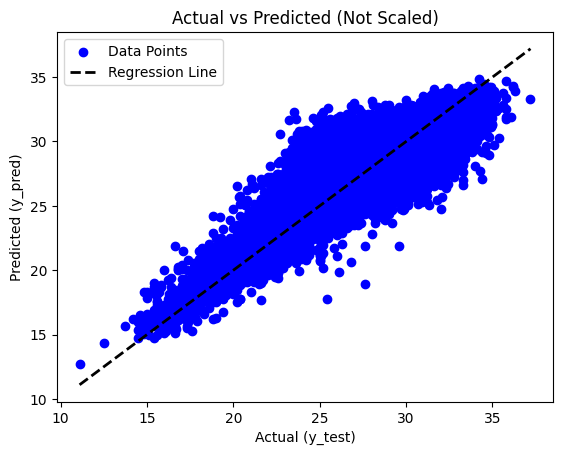

In [129]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, c='blue', label='Data Points')

#garis diagonal
y_min = min(min(y_test), min(y_pred))
y_max = max(max(y_test), max(y_pred))
plt.plot([y_min, y_max], [y_min, y_max], 'k--', lw=2, label='Regression Line')

plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted (y_pred)')

plt.title('Actual vs Predicted (Not Scaled)')
plt.legend()

plt.show()


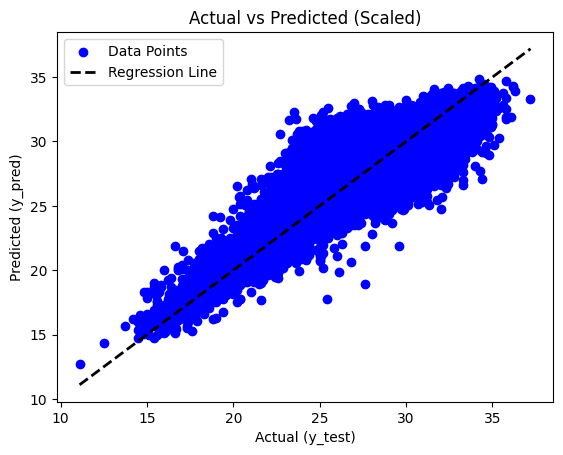

In [139]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_scaled, c='blue', label='Data Points')

#garis diagonal
y_min = min(min(y_test), min(y_pred_scaled))
y_max = max(max(y_test), max(y_pred_scaled))
plt.plot([y_min, y_max], [y_min, y_max], 'k--', lw=2, label='Regression Line')

plt.xlabel('Actual (y_test)')
plt.ylabel('Predicted (y_pred)')

plt.title('Actual vs Predicted (Scaled)')
plt.legend()

plt.show()


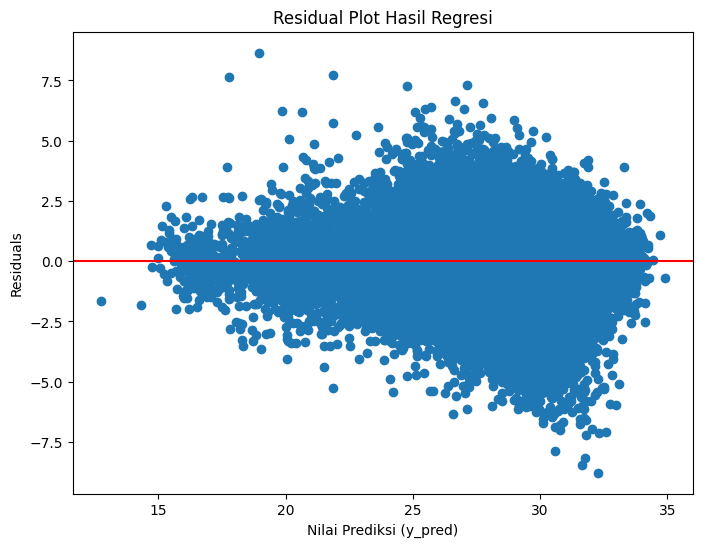

In [135]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Nilai Prediksi (y_pred)")
plt.ylabel("Residuals")
plt.title("Residual Plot Hasil Regresi")
plt.show()

In [144]:
X_test

,lokasi,con_prec.mm.,mic_prec.mm.,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,...,ws950.m.s.,wd950.deg.,t800.degC.,rh800...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.
96971,96207,0.000000,0.000000e+00,19.4623,16.2715,81.9519,1.377740,331.92400,0.208818,0.762595,...,1.83019,332.1240,15.3770,80.7043,1.72725,324.3900,-6.05793,87.41760,4.56308,71.6567
476650,97682,0.000000,0.000000e+00,25.4883,24.3308,93.4562,0.406224,327.85700,0.557187,0.656144,...,1.80173,73.6139,16.0484,89.4872,1.65414,73.6498,-4.42517,72.55360,1.74100,296.6390
287130,96935,0.000216,0.000000e+00,24.1654,23.5023,96.2340,2.502890,261.06900,0.505801,1.000000,...,3.71138,274.2420,14.4888,96.7136,5.50933,247.5100,-5.00356,92.95660,6.34562,279.2250
37697,96073,0.000000,0.000000e+00,22.5059,21.1238,92.0577,0.797636,130.74700,0.000000,0.324147,...,3.98308,101.2620,14.6926,83.0922,6.18748,87.7176,-5.97004,55.97160,7.00373,83.7783
158744,96557,0.018637,5.048710e-29,28.8496,22.9048,70.4013,1.834070,358.03700,0.771133,0.198344,...,2.67786,359.0060,16.9316,52.4465,6.07447,260.4990,-5.95965,74.81360,5.17388,135.2790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366718,97150,0.969415,2.226830e-04,26.7417,23.8251,84.1804,2.919300,95.65280,0.768958,0.553427,...,5.76911,107.5610,15.5559,82.7981,7.03148,111.5420,-4.88620,72.82200,8.44957,73.6760
178425,96595,2.552330,1.915940e-06,21.4381,21.4102,100.0000,0.436042,6.36252,0.969442,0.786716,...,2.30995,189.1310,14.7266,94.5976,1.90951,132.0630,-6.20114,82.75350,5.98380,89.0210
506651,97730,0.312581,1.680220e-31,25.8569,24.3583,91.5826,5.002120,149.29600,0.980744,0.719280,...,6.38156,155.0570,14.6733,90.6401,7.41723,138.8010,-4.27050,41.03360,4.17307,70.7755
27907,96037,0.035549,0.000000e+00,30.9103,23.3546,64.2477,1.890420,74.19460,0.595251,0.580731,...,1.93316,76.9399,16.4165,84.0576,3.33877,204.1950,-5.34172,78.92380,2.73354,31.5971


In [146]:
X.shape

(544274, 31)

In [147]:
X_test.shape

(54428, 31)

In [145]:
X_test.columns

Index(['lokasi', 'con_prec.mm.', 'mic_prec.mm.', 'suhu2m.degC.', 'dew2m.degC.',
       'rh2m...', 'wspeed.m.s.', 'wdir.deg.', 'lcloud...', 'mcloud...',
       'hcloud...', 'surpre.Pa.', 'clmix.kg.kg.', 'wamix.kg.kg.',
       'outlr.W.m2.', 'pblh.m.', 'lifcl.m.', 'cape.j.kg.', 'mdbz',
       't950.degC.', 'rh950...', 'ws950.m.s.', 'wd950.deg.', 't800.degC.',
       'rh800...', 'ws800.m.s.', 'wd800.deg.', 't500.degC.', 'rh500...',
       'ws500.m.s.', 'wd500.deg.'],
      dtype='object')

In [161]:
#OUTPUT

combined = pd.concat([df[['lokasi', 'suhu2m.degC.', 'LON','LAT','ELEV']],y_test, pd.Series(y_pred, index = X_test.index)], axis=1)
combined.columns = ['lokasi', 'suhu2m.degC.', 'LON','LAT','ELEV', 't_obs', 'Prediction']
combined = combined.dropna()
combined.tail(15)

,lokasi,suhu2m.degC.,LON,LAT,ELEV,t_obs,Prediction
544196,99992,24.5888,106.7564,-6.30253,41,25.8,25.725113
544197,99992,28.3851,106.7564,-6.30253,41,31.1,29.737902
544199,99992,29.4842,106.7564,-6.30253,41,30.4,31.801361
544206,99992,29.5268,106.7564,-6.30253,41,29.0,30.386723
544208,99992,30.0215,106.7564,-6.30253,41,32.7,31.486898
544211,99992,32.0115,106.7564,-6.30253,41,35.0,33.382477
544213,99992,25.6742,106.7564,-6.30253,41,29.8,26.760969
544214,99992,25.6170,106.7564,-6.30253,41,27.0,26.183607
544227,99992,30.2488,106.7564,-6.30253,41,33.0,30.517513
544231,99992,29.5414,106.7564,-6.30253,41,32.4,30.772316


In [162]:
combined.head(15)

,lokasi,suhu2m.degC.,LON,LAT,ELEV,t_obs,Prediction
3,96001,26.5672,95.33785,5.87655,126,21.6,23.831375
7,96001,27.1219,95.33785,5.87655,126,30.6,28.732576
8,96001,27.0680,95.33785,5.87655,126,26.6,27.270832
25,96001,27.8483,95.33785,5.87655,126,30.0,29.972692
32,96001,28.7548,95.33785,5.87655,126,27.4,28.149130
40,96001,27.5012,95.33785,5.87655,126,26.9,27.482788
45,96001,27.3166,95.33785,5.87655,126,28.1,27.858833
54,96001,28.1058,95.33785,5.87655,126,26.6,27.332897
81,96001,27.9836,95.33785,5.87655,126,30.7,29.592087
82,96001,28.1892,95.33785,5.87655,126,27.0,28.593254


In [155]:
combined.shape

(54428, 7)

In [131]:
model.save_model("xgb_tuned.json")